# 서울시 CCTV현황 분석 및 인구 현황 분석

### CCTV 설치 현황

In [239]:
import pandas as pd

In [240]:
CCTV_Seoul = pd.read_excel('../Data/CCTV_in_Seoul_2018.xlsx')
CCTV_Seoul.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [241]:
CCTV_Seoul.tail()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
20,용산구,2063,1279.0,152.0,201.0,107,102,89,60,73
21,은평구,2962,1365.0,83.0,99.0,343,180,296,229,367
22,종로구,1471,8.0,7.0,599.0,132,195,148,281,101
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328
24,중랑구,1068,NaN,NaN,NaN,770,102,121,66,9


In [242]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2011년 이전', '2012년', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년'],
      dtype='object')

In [243]:
# CCTV_Seoul의 첫번째 컬럼 확인
CCTV_Seoul.columns[0]

'기관명'

In [244]:
# 기관명 -> 구별로 변경
CCTV_Seoul.rename(columns={'기관명':'구별'}, inplace=True)
CCTV_Seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [245]:
# NaN을 확인하고 NaN을 0으로 대체하기
CCTV_Seoul = CCTV_Seoul.fillna(0)
CCTV_Seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


---
서울 인구 2020

In [246]:
pop_Seoul = pd.read_excel(
                            '../Data/population_in_Seoul_2020.xlsx', 
                            header=3,
                            usecols="B,D,G,J,N"
)
# pop_Seoul = pop_Seoul.loc[:4,['자치구','계','계.1','계.2','65세이상고령자']]
pop_Seoul.head()


,자치구,계,계.1,계.2,65세이상고령자
0,합계,10013781,9733655,280126,1518239
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728


In [247]:
pop_Seoul.columns=[ '구별','인구수','한국인', '외국인','고령자']
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10013781,9733655,280126,1518239
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728


In [248]:
pop_Seoul.drop(0,inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728
5,광진구,365990,350417,15573,48989


### CCTV 현황

In [249]:
# CCTV에서 소계로 오름차순 정렬
CCTV_Seoul.sort_values("소계", inplace=True)
CCTV_Seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
9,도봉구,858,197.0,66.0,8.0,185,59,155,117,71
24,중랑구,1068,0.0,0.0,0.0,770,102,121,66,9
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
22,종로구,1471,8.0,7.0,599.0,132,195,148,281,101
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328


> CCTV 댓수가 적은 지역으로는 도봉구, 중랑구, 강북구, 종로구, 중구 순이다. 

In [250]:
# CCTV에서 소계로 내림차순 정렬
CCTV_Seoul.sort_values(by="소계", ascending=False).head()


,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671
6,구로구,3227,852.0,219.0,349.0,187,268,326,540,486
16,성북구,3003,779.0,84.0,304.0,241,279,388,285,643
21,은평구,2962,1365.0,83.0,99.0,343,180,296,229,367


> CCTV댓수가 많은 지역으로는 강남구, 관악구, 구로구, 성북구, 은평구 순이다.

In [251]:
#### 최근 3년간 CCTV증가율 구해서 CCTV가 제일 많이 증가한 구를 검색후 정렬
# (올해의 값 - 작년의 값) / 작년의 값 * 100
CCTV_Seoul['최근증가율'] = (CCTV_Seoul.loc[:,'2016년':'2018년'].sum(axis=1)
                       / CCTV_Seoul.iloc[:, 2:7].sum(axis=1)) * 100
CCTV_Seoul.sort_values("최근증가율",ascending=False).head()


,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328,145.468998
19,영등포구,2495,132.0,121.0,206.0,217,366,289,371,793,139.443378
15,성동구,2679,665.0,109.0,118.0,101,258,201,933,294,114.148681
7,금천구,1634,27.0,17.0,242.0,101,382,136,199,530,112.483745
5,광진구,1581,470.0,42.0,83.0,87,64,21,468,346,111.930295


> 결과를 보면 최근 3년간의 CCTV가 2015년 이전에 비해 가장 많이 증가한 곳은 중구, 영등포구, 성동구, 금천구, 광진구 순이다.

---
# 인구 현황

In [252]:
# 구별 Data의 유효성 확인
len(pop_Seoul['구별'].unique())

25

In [253]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728
5,광진구,365990,350417,15573,48989


In [254]:
# 인구수 대비 외국인비율, 고령자 비율
pop_Seoul['외국인비율'] = pop_Seoul.외국인 / pop_Seoul.인구수 * 100
pop_Seoul['고령자비율'] = pop_Seoul.고령자 / pop_Seoul.인구수 * 100
pop_Seoul.head()


,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,161984,151217,10767,28073,6.646953,17.330724
2,중구,136469,126175,10294,23794,7.543105,17.435462
3,용산구,246165,229579,16586,39439,6.737757,16.021368
4,성동구,307193,299042,8151,44728,2.653381,14.560228
5,광진구,365990,350417,15573,48989,4.255034,13.385338


In [255]:
# 인구수가 제일 많은 지역은 Top5
pop_Seoul.sort_values("인구수",ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,680883,674095,6788,89539,0.996941,13.150424
16,강서구,595703,589302,6401,85992,1.074529,14.435381
23,강남구,549898,544804,5094,72602,0.926354,13.202812
11,노원구,535495,531037,4458,82682,0.832501,15.440294
21,관악구,516662,499374,17288,76664,3.346095,14.838328


> 송파구 강서구 강남구 노원구 관악구

In [256]:
# 고령자수가 제일 많은 지역은 Top5
pop_Seoul.sort_values("고령자",ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,680883,674095,6788,89539,0.996941,13.150424
16,강서구,595703,589302,6401,85992,1.074529,14.435381
11,노원구,535495,531037,4458,82682,0.832501,15.440294
12,은평구,482509,478019,4490,82245,0.930553,17.045278
21,관악구,516662,499374,17288,76664,3.346095,14.838328


> 송파구 강서구 노원구 은평구 관악구

In [257]:
# 외국인이 제일 많은 지역은 Top5
pop_Seoul.sort_values("외국인",ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,404766,371903,32863,59373,8.119012,14.668475
17,구로구,438308,405837,32471,67432,7.408261,15.384615
18,금천구,251370,232583,18787,38508,7.473843,15.319251
21,관악구,516662,499374,17288,76664,3.346095,14.838328
6,동대문구,362793,346156,16637,60367,4.585811,16.639516


> 영등포구 중구구 금천구 구로구 용산구

In [258]:
# 외국인비율이 제일 많은 지역은 Top5
pop_Seoul.sort_values("외국인비율",ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,404766,371903,32863,59373,8.119012,14.668475
2,중구,136469,126175,10294,23794,7.543105,17.435462
18,금천구,251370,232583,18787,38508,7.473843,15.319251
17,구로구,438308,405837,32471,67432,7.408261,15.384615
3,용산구,246165,229579,16586,39439,6.737757,16.021368


In [259]:
# 고령자 정렬
pop_Seoul.sort_values("고령자",ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,680883,674095,6788,89539,0.996941,13.150424
16,강서구,595703,589302,6401,85992,1.074529,14.435381
11,노원구,535495,531037,4458,82682,0.832501,15.440294
12,은평구,482509,478019,4490,82245,0.930553,17.045278
21,관악구,516662,499374,17288,76664,3.346095,14.838328


In [260]:
# 고령자 비율 정렬
pop_Seoul.sort_values("고령자비율",ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,316750,312985,3765,61660,1.188635,19.466456
10,도봉구,333495,331238,2257,60023,0.676772,17.998171
2,중구,136469,126175,10294,23794,7.543105,17.435462
1,종로구,161984,151217,10767,28073,6.646953,17.330724
12,은평구,482509,478019,4490,82245,0.930553,17.045278


3조
> 영등포구가 외국인인구수, 외국인 비율이 가장 높게 나타나는 경향을 보인다.     
> 영등포구, 금천구, 구로구는 외국인 인구수와 외국인비율이 높게 나타나는 경향을 보인다.     
> 은평구를 제외한 나머지 구는 고령자인구와 고령자비율이 비례하지 않는다.      
> 인구수가 많은 상위 다섯개 구 중에 4개의 구가 고령자수가 높게 나타나는 경향을 보인다.(즉 인구수와 고령자수는 비례관계를 보인다.)      
> 고령자 비율은 강북지역이 높다.      
> 인구수 상위 5개 지역구 중 4군데가 강남지역이다.     


인구수가 제일 많은 지역은 송파구이지만 영등포구가 외국인이 가장 많다.     
그리고 그 근처라고 할 수 있는 구로구, 금천구 외국인이 많다.       
송파구는 고령자가 제일 많지만 고령자의비율이 높지 않은 것으로 확인된다.     
하지만 강북구, 도봉구, 중구, 종로구, 은평구의 경우에는      
인구수 대비 고령자 비율이 많기 때문에 추후 고령화가 우려된다.       

---
# CCTV의 인구현황 합치기


In [261]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,도봉구,858,197.0,66.0,8.0,185,59,155,117,71,66.601942,333495,331238,2257,60023,0.676772,17.998171
1,중랑구,1068,0.0,0.0,0.0,770,102,121,66,9,22.477064,400678,395619,5059,66764,1.262610,16.662757
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319,83.068017,316750,312985,3765,61660,1.188635,19.466456
3,종로구,1471,8.0,7.0,599.0,132,195,148,281,101,56.323061,161984,151217,10767,28073,6.646953,17.330724
4,중구,1544,25.0,165.0,114.0,80,245,270,317,328,145.468998,136469,126175,10294,23794,7.543105,17.435462


In [262]:
delColumn = data_result.columns[2:10]

for i in delColumn:
    del data_result[i]
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,도봉구,858,66.601942,333495,331238,2257,60023,0.676772,17.998171
1,중랑구,1068,22.477064,400678,395619,5059,66764,1.262610,16.662757
2,강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456
3,종로구,1471,56.323061,161984,151217,10767,28073,6.646953,17.330724
4,중구,1544,145.468998,136469,126175,10294,23794,7.543105,17.435462


In [263]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
도봉구,858,66.601942,333495,331238,2257,60023,0.676772,17.998171
중랑구,1068,22.477064,400678,395619,5059,66764,1.262610,16.662757
강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456
종로구,1471,56.323061,161984,151217,10767,28073,6.646953,17.330724
중구,1544,145.468998,136469,126175,10294,23794,7.543105,17.435462


In [264]:
import numpy as np

In [265]:
# 고령자 비율과 소계의 상관계수
np.corrcoef(data_result['고령자비율'], data_result['소계'])

array([[ 1.        , -0.44225083],
       [-0.44225083,  1.        ]])

In [266]:
# 고령자와 소계의 상관계수
np.corrcoef(data_result['고령자'], data_result['소계'])

array([[1.        , 0.28638538],
       [0.28638538, 1.        ]])

In [267]:
# 외국인 비율과 소계의 상관계수
np.corrcoef(data_result['외국인비율'], data_result['소계'])


array([[ 1.        , -0.06215538],
       [-0.06215538,  1.        ]])

In [268]:
# 인구수와 소계의 상관계수
np.corrcoef(data_result['인구수'], data_result['소계'])


array([[1.        , 0.38064812],
       [0.38064812, 1.        ]])

> 고령자 비율의 상관계수를 보면 역상관이 발생하고 이는 고령자가 아닌 젊은층 비율이 높은 곳에 CCTV가 많이 설치되는 경향을 보이며         
> 주로 인구수와 양의 상관을 보이고 있어 CCTV 댓수는 인구수에 비례하여 증가하는 경향을 보인다.     


---
# 시각화

In [269]:
# import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

In [270]:
# 한글 폰트 문제 해결
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')  # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'  # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")


In [271]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
도봉구,858,66.601942,333495,331238,2257,60023,0.676772,17.998171
중랑구,1068,22.477064,400678,395619,5059,66764,1.262610,16.662757
강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456
종로구,1471,56.323061,161984,151217,10767,28073,6.646953,17.330724
중구,1544,145.468998,136469,126175,10294,23794,7.543105,17.435462


In [272]:
# 파일로 저장 (CCTV_Result.csv)
data_result.to_csv('../Data/CCTV_Result.csv')

In [273]:
gu = data_result.loc[:,['소계']]
gu.head()

,소계
구별,
도봉구,858
중랑구,1068
강북구,1265
종로구,1471
중구,1544


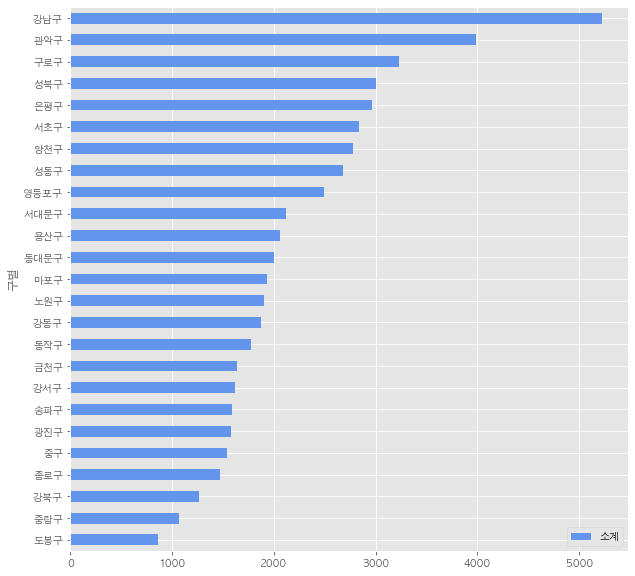

In [274]:
# 막대 그래프 그리기

plt.style.use("ggplot")

gu.plot(
    kind='barh',
    color='cornflowerblue',
    figsize= (10, 10)
)

plt.ylabel('구별')
plt.show()

In [275]:
gu1 = data_result.loc[:, ['소계']].sort_values('소계')
gu1.head()

,소계
구별,
도봉구,858
중랑구,1068
강북구,1265
종로구,1471
중구,1544


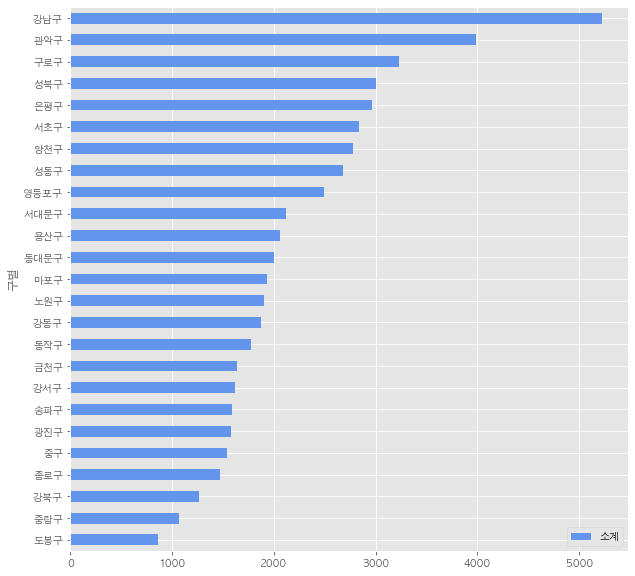

In [276]:
# 막대 그래프 그리기

plt.style.use("ggplot")

gu1.plot(
    kind='barh',
    color='cornflowerblue',
    figsize=(10, 10)
)

plt.ylabel('구별')
plt.show()


# 인구 대비 CCTV 비율

In [277]:
pop = data_result.loc[:, ['소계','인구수']]
pop.head()


,소계,인구수
구별,,
도봉구,858,333495
중랑구,1068,400678
강북구,1265,316750
종로구,1471,161984
중구,1544,136469


In [278]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
도봉구,858,66.601942,333495,331238,2257,60023,0.676772,17.998171
중랑구,1068,22.477064,400678,395619,5059,66764,1.262610,16.662757
강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456
종로구,1471,56.323061,161984,151217,10767,28073,6.646953,17.330724
중구,1544,145.468998,136469,126175,10294,23794,7.543105,17.435462


In [279]:
data_result['CCTV비율'] = data_result.소계 / data_result.인구수 * 10000
data_result.head()


,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
도봉구,858,66.601942,333495,331238,2257,60023,0.676772,17.998171,25.727522
중랑구,1068,22.477064,400678,395619,5059,66764,1.262610,16.662757,26.654820
강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456,39.936859
종로구,1471,56.323061,161984,151217,10767,28073,6.646953,17.330724,90.811438
중구,1544,145.468998,136469,126175,10294,23794,7.543105,17.435462,113.139248


Text(0, 0.5, '구별')

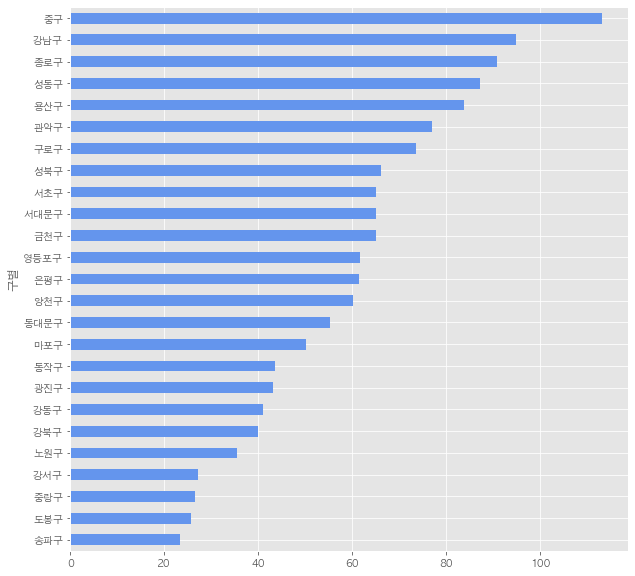

In [280]:
data_result.CCTV비율.sort_values().plot(
    kind='barh',
    color = 'cornflowerblue',
    figsize = (10, 10)
)
plt.ylabel("구별")

Text(0, 0.5, '구별')

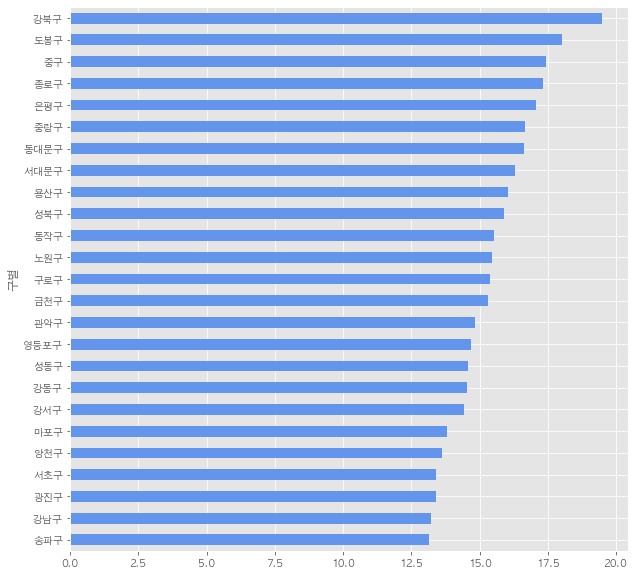

In [281]:
data_result.고령자비율.sort_values().plot(
    kind='barh',
    color='cornflowerblue',
    figsize=(10, 10)
)
plt.ylabel("구별")


> 중구가 CCTV 대수는 가장 적으나 인구대비 CCTV 비율이 가장 높게 나타난다.   
> 강남구가 CCTV 대수가 가장 높게 나타나고 비율 또한 2번째로 가장 높게 나타난다.     
> 강북구, 도봉구 는 고령자비율이 가장 높지만, CCTV 비율은 밑에서 6번째, 2번째로 낮게 나타난다.      
>


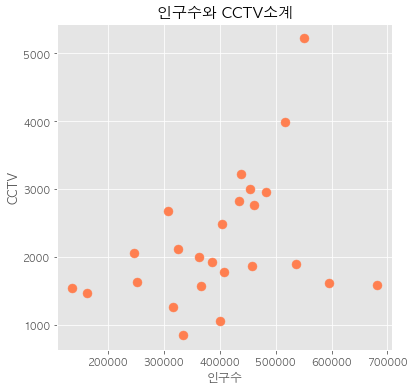

In [303]:
# 산점도를 이용한 시각화 (인구수와 소계)

data_result.plot(
    kind='scatter',
    x='인구수',
    y='소계',
    color='coral',
    # color = cylinder_size,
    s = 80,
    marker = 'o',
    alpha=1,
    figsize=(6, 6),

)
plt.ylabel("CCTV")
plt.title("인구수와 CCTV소계", size=15)
plt.show()

In [305]:
# 인구수, 소계에 따른 기준직선 (회귀선, 평균선) 만들기
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([2.88522756e-03, 1.06403852e+03])

 
0.002885 x + 1064
[100000.         112244.89795918 124489.79591837 136734.69387755
 148979.59183673 161224.48979592 173469.3877551  185714.28571429
 197959.18367347 210204.08163265 222448.97959184 234693.87755102
 246938.7755102  259183.67346939 271428.57142857 283673.46938776
 295918.36734694 308163.26530612 320408.16326531 332653.06122449
 344897.95918367 357142.85714286 369387.75510204 381632.65306122
 393877.55102041 406122.44897959 418367.34693878 430612.24489796
 442857.14285714 455102.04081633 467346.93877551 479591.83673469
 491836.73469388 504081.63265306 516326.53061224 528571.42857143
 540816.32653061 553061.2244898  565306.12244898 577551.02040816
 589795.91836735 602040.81632653 614285.71428571 626530.6122449
 638775.51020408 651020.40816327 663265.30612245 675510.20408163
 687755.10204082 700000.        ]


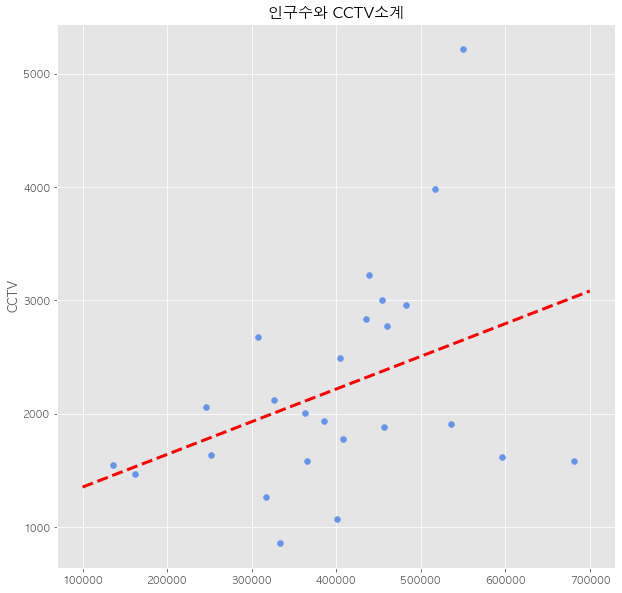

In [314]:
# x축 만들기 : 인구수 표현
fx = np.linspace(100000, 700000)

# y축 데이터 만들기 : CCTV 소계 표현
f1 = np.poly1d(fp1)

print(f1) # f1은 회귀식이 나오고
print(fx) # fx은 위에 설정해준 데이터 범위 내에서 나오는것

plt.figure(figsize=(10, 10))
plt.scatter(data_result.인구수, data_result.소계, color='cornflowerblue',)
plt.plot(fx, f1(fx), ls = 'dashed', lw=3, color = 'r')   # 기준 직선인 회귀선 그려주기
plt.ylabel("CCTV")
plt.title("인구수와 CCTV소계", size=15)
plt.show()

> 이 직선은 CCTV 댓수에 기준값이 됩니다.        
> 이 직선을 기준으로 상위에 있는 점은 과하게 설치 된 것이고     
> 직선 보다 하위에 있는 점은 인구수에 비해 CCTV가 부족하다는 해석이 됩니다.         

In [318]:
# 정답과 예측값에 대한 오차범위가 얼마나 되느냐! 를 확인해야함.
# 기준선 구하기

fp1 = np.polyfit(data_result.인구수, data_result.소계, 1)   # 1은 1차원이라고 말해주는 것

# 기준치 구하기
f1 = np.poly1d(fp1)

# 인구수
fx = np.linspace(100000, 700000)

# 소계에서 기준 인구수 차이로 오차값 구하기
data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

# 정렬
df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

# 오차는 그래프에서 구 이름을 표현하기 위해서 오차값을 절댓값으로 구한 것. ! 
# 그래서 원래는 도봉구 관악구의 경우에는 마이너스 값인데, 지금은 절대값으로 상수로 구해냈던 이유이다. 
# 오차의 범위를 구하는 이유는 과대적합과 연관???? -> 물어보기


,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812,94.944881,2570.380612
송파구,1586,62.833676,680883,674095,6788,89539,0.996941,13.150424,23.293282,1442.540920
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328,77.129729,1430.274035
도봉구,858,66.601942,333495,331238,2257,60023,0.676772,17.998171,25.727522,1168.247488
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381,27.144399,1165.777237


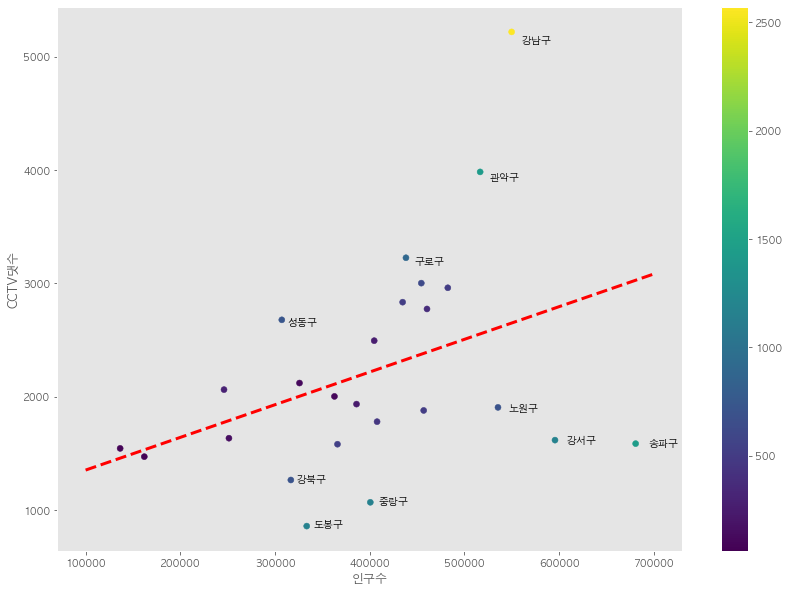

In [323]:
# 그래프의 텍스트와 Color
plt.figure(figsize=(14, 10))    # 범례를 위해 크기를 키워주고
plt.scatter(data_result['인구수'], data_result['소계'], c=data_result['오차'])

plt.plot(fx, f1(fx), ls='dashed', lw=3, color='r')   # 기준 직선인 회귀선 그려주기

# 오차가 가장 큰 10개 구에 텍스트 붙이기   df_sort는 정리해둔거라서 강남구부터 차례대로 찍힘
for n in range(10):
    plt.text(df_sort['인구수'][n] * 1.02, df_sort['소계'][n] * 0.98, df_sort.index[n], fontsize=10 )


# plt.text(500000, 3000, 'test') 

plt.xlabel('인구수')
plt.ylabel('CCTV댓수')
plt.colorbar()
plt.grid()
plt.show()